In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[[ 1.         -0.00521971]
 [-0.00521971  1.        ]]
[[1.         0.02369043]
 [0.02369043 1.        ]]
[[1.         0.04735994]
 [0.04735994 1.        ]]


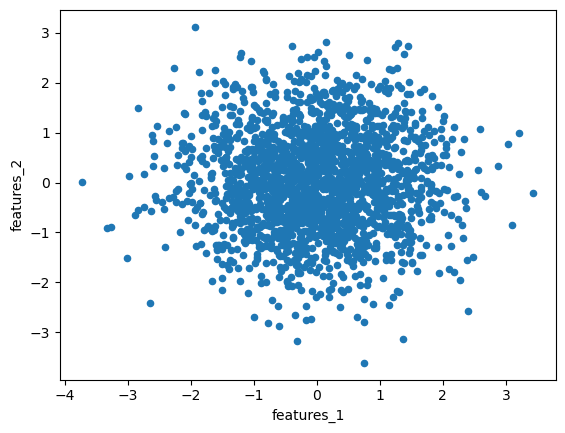

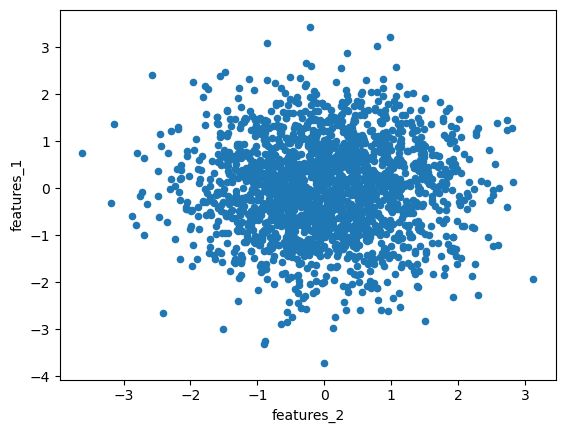

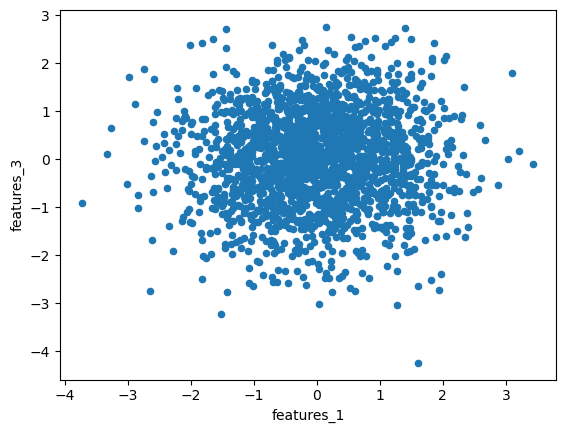

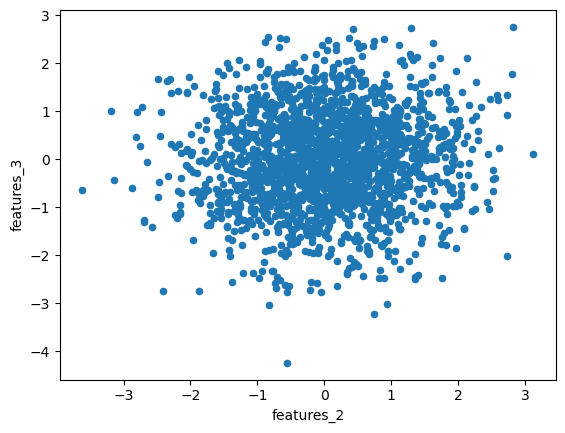

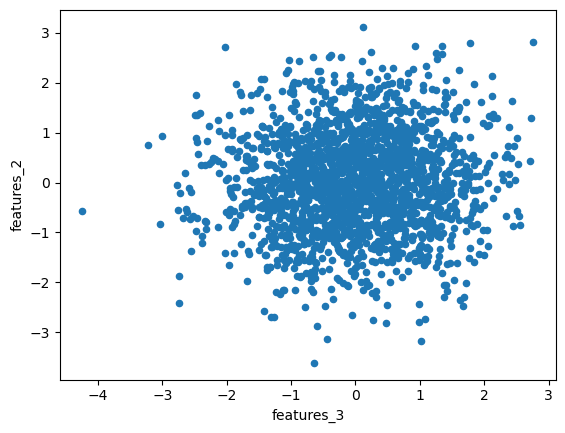

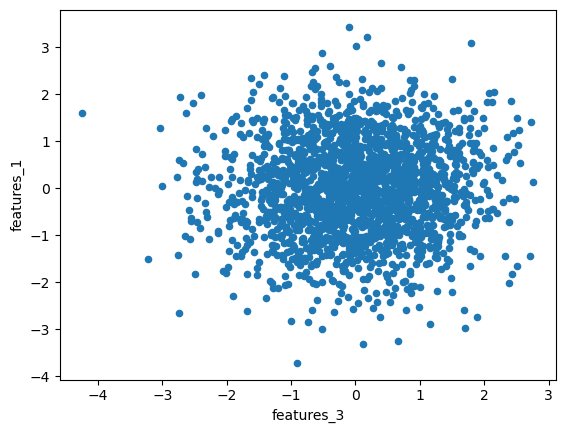

In [14]:
#QUESTION 1
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
df = pd.read_csv('data/regression_generated.csv')

df.plot.scatter(x = 'features_1', y = 'features_2')
df.plot.scatter(x = 'features_2', y = 'features_1')
df.plot.scatter(x = 'features_1', y = 'features_3')
df.plot.scatter(x = 'features_2', y = 'features_3')
df.plot.scatter(x = 'features_3', y = 'features_2')
df.plot.scatter(x = 'features_3', y = 'features_1')

print(np.corrcoef(df['features_1'], df['features_2']))
print(np.corrcoef(df['features_1'], df['features_3']))
print(np.corrcoef(df['features_2'], df['features_3']))



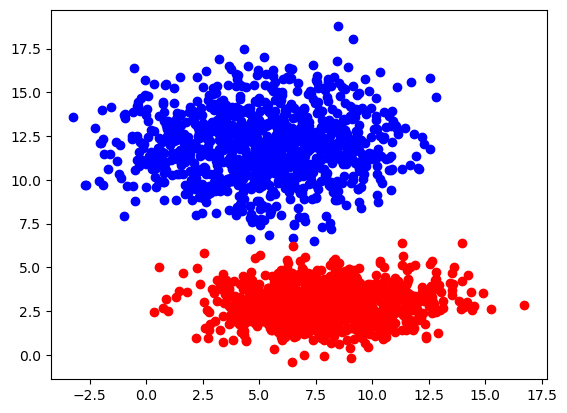

In [8]:
#QUESTION 2
mu_1_x, sigma_1_x = 5, 3 # mean and standard deviation
mu_1_y,sigma_1_y = 12, 2
mu_2_x, sigma_2_x = 8, 2.5 # mean and standard deviation
mu_2_y,sigma_2_y = 3,1

s_1_x = np.random.normal(mu_1_x, sigma_1_x, 1000)
s_1_y = np.random.normal(mu_1_y,sigma_1_y, 1000)

s_2_x = np.random.normal(mu_2_x, sigma_2_x, 1000)
s_2_y = np.random.normal(mu_2_y,sigma_2_y, 1000)

plt.scatter(s_1_x,s_1_y, c = "blue")
plt.scatter(s_2_x,s_2_y, c = "red")


--2022-12-10 18:49:08--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-12-10 18:49:09--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6ef39f4570a015b9bcf5d9dab6.dl.dropboxusercontent.com/cd/0/inline/ByUUhvlEdsX36jAgfSX4OF7HdiYmuJ0qJnCs0SSaTCYIKrC0r35SeMpZgVrJ2cevaC0u4sox4CUc5vw3ASHlMRpX301tSVGfhOvEt_OraJWHipWtznrl5iU8ReEPljCOLwS32SwhZAAtTr7f4-GCi0t4_MgiGdeazv_vs-9qMgu6Dw/file# [following]
--2022-12-10 18:49:09--  https://uc6ef39f4570a015b9bcf5d9dab6.dl.dropboxusercontent.com/cd/0/inline/ByUUhvlEdsX36jAgfSX4OF7HdiYmuJ0qJnCs0SSaTCYIKrC0r35SeMpZgVrJ2cevaC0u4sox4CUc5vw3ASHlMRpX301

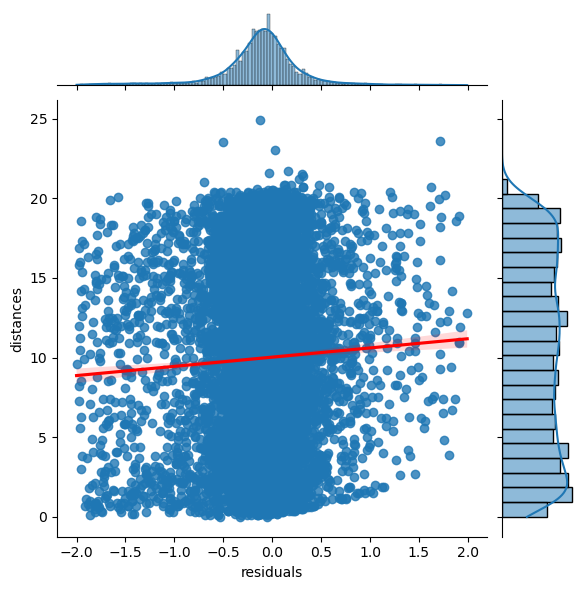

In [11]:
#QUESTION 3
import pickle
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
unpickled_df = pd.read_pickle("data/residuals_261.pkl")
infile = open("data/residuals_261.pkl",'rb')
new_dict = pickle.load(infile)
infile.close()
new_df= new_dict.item()
new_df = pd.DataFrame(new_df)
new_df = new_df[np.abs(new_df['residuals'])<2]

sns.jointplot(x='residuals', y='distances', data = new_df, kind = 'reg', joint_kws={'line_kws':{'color':'red'}})
correlation_q_3 = np.corrcoef(new_df['residuals'], new_df['distances'])



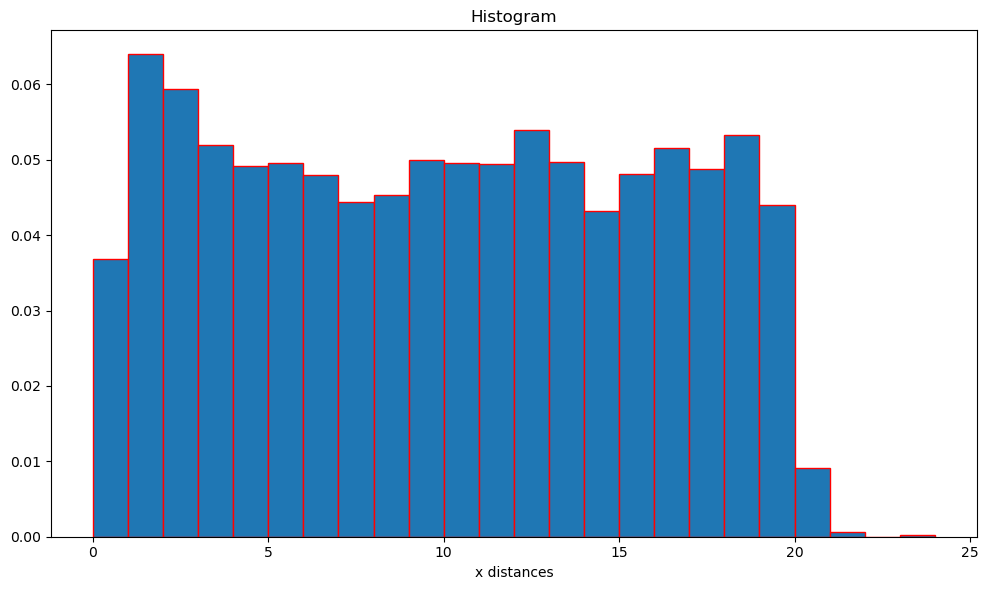

In [12]:
fig = plt.figure(figsize=(10, 6)) # create the figure and the axes
plt.hist(new_df['distances'], bins=np.arange(min(new_df['distances']), max(new_df['distances'])), density=True,edgecolor='red') # create and plot the histogram
ax = fig.axes[0]
ax.set_title('Histogram')
ax.set_xlabel('x distances')
fig.tight_layout()

C:\Users\crnyl\AppData\Local\Temp\ipykernel_13132\3860992720.py:3: RuntimeWarning: Mean of empty slice.
  y = [ np.array(new_df['residuals'][ (new_df['distances']< x[i+1]) & (new_df['distances']> x[i])  ]).mean() for i in range(len(x)-1)] #residuals should be taken considering the distances
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\crnyl\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret /

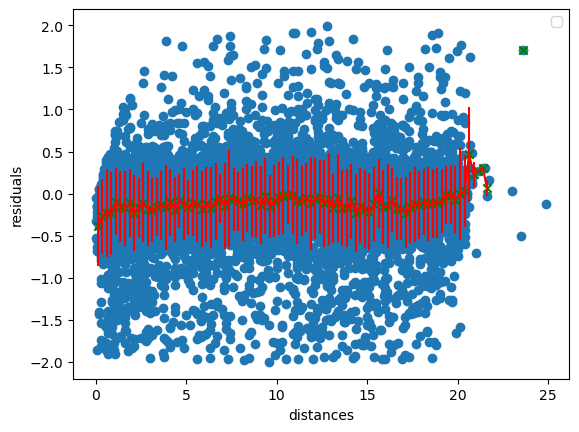

In [13]:
x = np.arange(0,max(new_df['distances']),0.25)
bins = (x[1:]+x[:-1])/2 # making center considering the left most right most elements
y = [ np.array(new_df['residuals'][ (new_df['distances']< x[i+1]) & (new_df['distances']> x[i])  ]).mean() for i in range(len(x)-1)] #residuals should be taken considering the distances  
erry = [ np.array(new_df['residuals'][ (new_df['distances']< x[i+1]) & (new_df['distances']> x[i]) ]).std() for i in range(len(x)-1)]
fig, ax = plt.subplots()
ax.scatter(new_df['distances'],new_df['residuals'])

ax.scatter(bins,y,marker = 'x',color='green')
ax.errorbar(bins,y,erry,color='red')
ax.set_xlabel('distances')
ax.set_ylabel('residuals')
ax.legend()

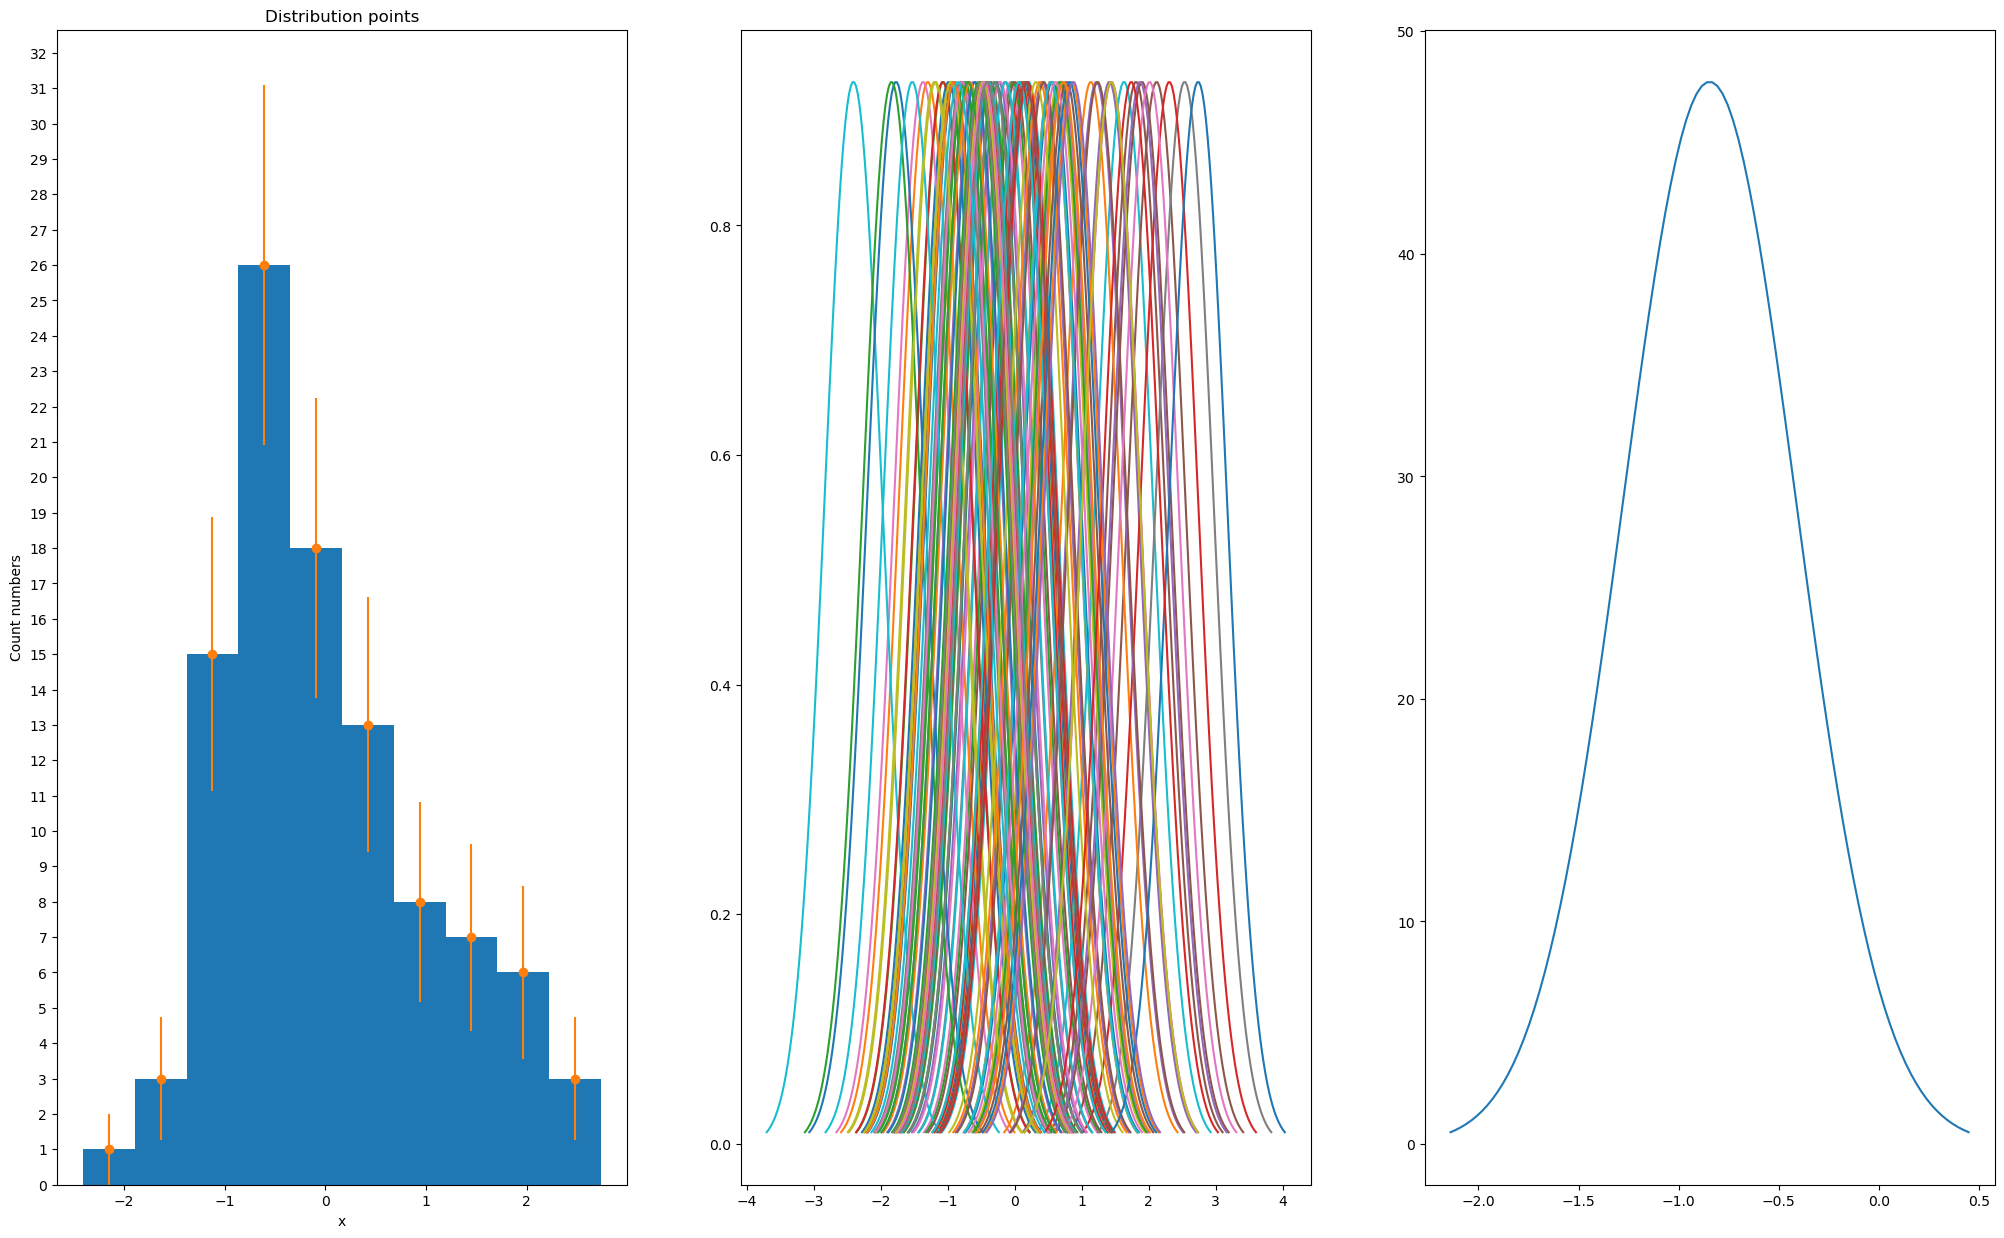

In [10]:
#QUESTION 4
import numpy as np
from scipy import stats
from scipy.integrate import trapz
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

mu, sigma, N = 0, 1, 100
x = np.random.normal(mu, sigma, N)


fig, ax = plt.subplots(1,3,figsize=(25,15)) #3 sub plots
num_bin = int(np.sqrt(x.shape[0]))
counts, bins, _ = ax[0].hist(x, num_bin) # return the counts and bins(as integer)
center_bin = (bins[1:] + bins[:-1])/2
width = bins[1] - bins[0] #defining width
area = sum(counts)*width  # calculating the using the summation of counts
ax[0].errorbar(center_bin, counts, yerr=np.sqrt(counts), fmt='o')
ax[0].yaxis.set_major_locator(MultipleLocator(1))
ax[0].set_title("Distribution points")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Count numbers")

std_dev = 1.06*x.std()*(x.size**(-1/5)) # standart deviation default value
gaussian = []
for i in range(N): # for every element (N) of x
    mu = x[i] #mean corresponding to element value
    tuned_X = np.linspace(mu - 3*std_dev, mu + 3*std_dev, 100) # setting the linspace considering the range of the gaussian shape 
    gaussian.append(stats.norm.pdf(tuned_X, mu, std_dev)) # normalizing and constructing the array
    ax[1].plot(tuned_X, gaussian[i])
    
summation= np.sum(gaussian,axis=0)
normalized = summation*area/(trapz(summation,tuned_X)) #normalize the result such that the integral matches the integral of the original histogram
ax[2].plot(tuned_X,normalized)

plt.show()